 ## Predict number of bikers on a given day using linear regression


In [ ]:
from IPython.display import clear_output

In [ ]:
# Don't modify this code


%pip install gdown==4.5


clear_output()

In [ ]:
# Download the CSV file.
!gdown 1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD

Downloading...
From: https://drive.google.com/uc?id=1_eJU8Y-31_l0oq1sSJT6pROJyo-ufuvD
To: /content/bikers_data.csv
100% 213k/213k [00:00<00:00, 115MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data_df = pd.read_csv('bikers_data.csv')

In [ ]:
data_df.head()

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y = data_df['Number of bikers'] # target
data_x = data_df.drop(['Number of bikers'], axis=1) # input features

In [ ]:
data_df = data_df.drop(['Date'], axis = 1)

In [ ]:
data_df.head()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_x.head()

,Date,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,2012-10-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,2012-10-05,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,2012-10-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,2012-10-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_x.drop(['Date'], axis = 1)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0
2642,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1
2643,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0
2644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.265207,0.04,45.5,0


In [ ]:
data_df.head()

,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,56.0,1
1,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,56.5,1
2,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,59.5,1
3,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,60.5,1
4,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,60.5,1


In [ ]:
data_y

0       14084.0
1       13900.0
2       12592.0
3        8024.0
4        8568.0
         ...   
2641     4552.0
2642     3352.0
2643     3692.0
2644     7212.0
2645     4568.0
Name: Number of bikers, Length: 2646, dtype: float64

In [ ]:
data_x = (data_df - data_df.mean()) / (data_df.max() - data_df.min())


In [ ]:
y = data_df['Number of bikers']

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)


In [ ]:
x_train = x_train.T

In [ ]:
y_train = np.array([y_train])

In [ ]:
x_test = x_test.T

In [ ]:
y_test = np.array([y_test])

In [ ]:
def initilize_parameters(n):
  w = np.random.rand(1, n)
  b = 0

  return w, b

In [ ]:
def forward(X, w, b):

  z = (np.dot(w, X) + b)

  return z

In [ ]:
def cost_function(z, y):
  m = y.shape[1]
  J = (1 / (2 * m) * np.sum(np.square(z - y)))

  return J

In [ ]:
def back_prop(X, y, z):
  m = y.shape[1]

  dz = (1 / m) * (z - y)

  dw = np.dot(dz, X.T)

  db = np.sum(dz)

  return dw, db

In [ ]:
def gradient_descent_update(w, b, dw, db, lr):

  w -=  lr * dw
  b -= lr * db

  return w, b

In [ ]:
# the model
def linear_regression_model(x_train, y_train, x_test, y_test, lr, epochs):

  n = x_train.shape[0]
  w, b = initilize_parameters(n)

  costs_train = []
  m_train = y_train.shape[1]
  m_test = y_test.shape[1]

  # Training
  for i in range(epochs):

    y_pre = forward(x_train, w, b)
    cost_train = cost_function(y_pre, y_train)

    dw, db = back_prop(x_train, y_train, y_pre)
    w, b = gradient_descent_update(w, b, dw, db, lr)

    # store training cost in a list for plotting purpose
    if i % 10 == 0:
      costs_train.append(cost_train)

    y_pre_test = forward(x_test, w, b)
    cost_test = cost_function(y_pre_test, y_test)


    # print cost_train, cost_val, MAE_train, MAE_val
    print(f'Epochs {i + 1} / {epochs}: ')
    print(f'Training cost {cost_train} | Testing cost {cost_test}')

  plt.plot(costs_train)
  plt.xlabel('Iterations(per tens)')
  plt.ylabel('Training cost')
  plt.title('Learning rate ' + str(lr))
  plt.show()

Epochs 1 / 1000: 
Training cost 74454618.32862577 | Testing cost 76926493.65498774
Epochs 2 / 1000: 
Training cost 73210299.96790938 | Testing cost 75673329.029995
Epochs 3 / 1000: 
Training cost 71989866.76920396 | Testing cost 74443882.54117225
Epochs 4 / 1000: 
Training cost 70792847.6264313 | Testing cost 73237689.85313566
Epochs 5 / 1000: 
Training cost 69618780.78756803 | Testing cost 72054295.81447534
Epochs 6 / 1000: 
Training cost 68467213.66858965 | Testing cost 70893254.27544302
Epochs 7 / 1000: 
Training cost 67337702.67111711 | Testing cost 69754127.90926428
Epochs 8 / 1000: 
Training cost 66229813.003692456 | Testing cost 68636488.03700323
Epochs 9 / 1000: 
Training cost 65143118.506610736 | Testing cost 67539914.45590864
Epochs 10 / 1000: 
Training cost 64077201.48023802 | Testing cost 66463995.271172576
Epochs 11 / 1000: 
Training cost 63031652.51674572 | Testing cost 65408326.73103385
Epochs 12 / 1000: 
Training cost 62006070.33519335 | Testing cost 64372513.06515889
E

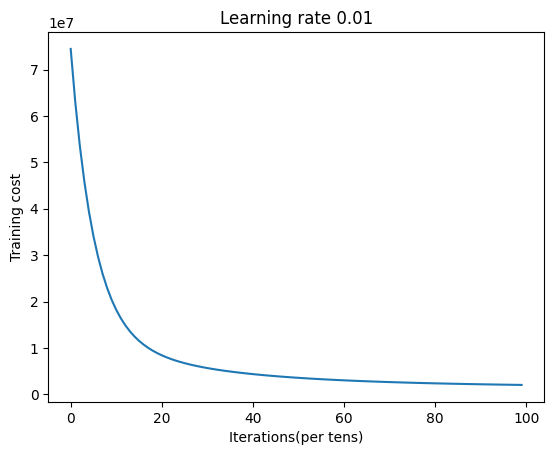

In [ ]:
linear_regression_model(x_train, y_train, x_test, y_test, 0.01,1000)